In [28]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot 
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

#### 1. В файле lifeline.xls содержатся 50 пар наблюдений из исследования докторов Л. Матера и М. Уилсона. В нем рассматривались следующие переменные: X — длина «линии жизни» на левой руке в сантиметрах (с точностью до 0.15 см) и Y — продолжительность жизни человека (округленная до ближайшего целого года). Изучите корреляцию X и Y . Верно ли, что X и Y связаны линейной регрессионной зависимостью?

In [98]:
np.random.seed(21)

In [99]:
data = pd.read_excel('../HW5_Data/lifeline.xls')

In [100]:
data.head()

,X,Y
0,9.75,19
1,9.00,40
2,9.60,42
3,9.75,42
4,11.25,47


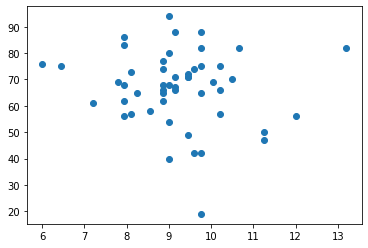

In [101]:
line = data['X']
life = data['Y']
plt.scatter(line, life)
plt.show()

In [102]:
# коэффициент корреляции Пирсона

stats.pearsonr(line, life)

(-0.122553650859522, 0.3965106928959566)

In [103]:
# коэффициент корреляции Спирмена

stats.spearmanr(line, life)

SpearmanrResult(correlation=-0.08601349137019551, pvalue=0.5525613938198386)

In [104]:
# коэффициент корреляции Кендалла

stats.kendalltau(line, life)

KendalltauResult(correlation=-0.044979908444122044, pvalue=0.6559222232961208)

Вывод: "линия жизни" и жизнь отрицательно коррелированы.

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


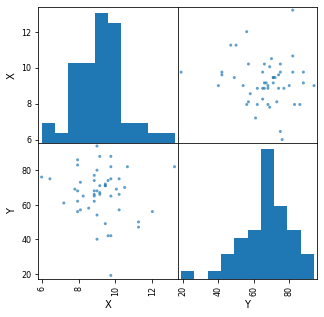

In [105]:
pd.plotting.scatter_matrix(data[['X', 'Y']], figsize=(5, 5), alpha=0.7)
plt.show()

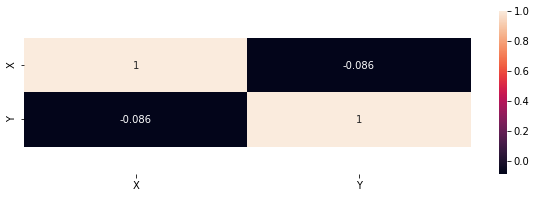

In [106]:
plt.figure(figsize = (10,3))
ax = sns.heatmap(data[['X', 'Y']].corr(method = 'spearman'), annot = True)

# подправим вывод
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#####

plt.show()

Обработаем данные

In [107]:
data = data[data['Y'] > 30]

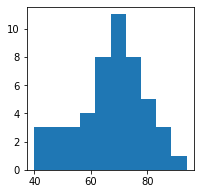

In [108]:
data['Y'].hist(figsize=(3,3), grid=False)
plt.show()

In [109]:
stats.pearsonr(data['X'], data['Y'])

(-0.10541261807860831, 0.471000817300877)

In [110]:
m1 = smf.ols('X ~ Y', data=data)
m1fitted = m1.fit()

print(m1fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5281
Date:                Wed, 05 May 2021   Prob (F-statistic):              0.471
Time:                        19:05:21   Log-Likelihood:                -80.675
No. Observations:                  49   AIC:                             165.4
Df Residuals:                      47   BIC:                             169.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9173      1.022      9.705      0.0

X и Y не связаны линейной регрессионной зависимостью. Видим по маленькому значениб R^2 и информационным критериям: отрицательному логарифму правдоподобия

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


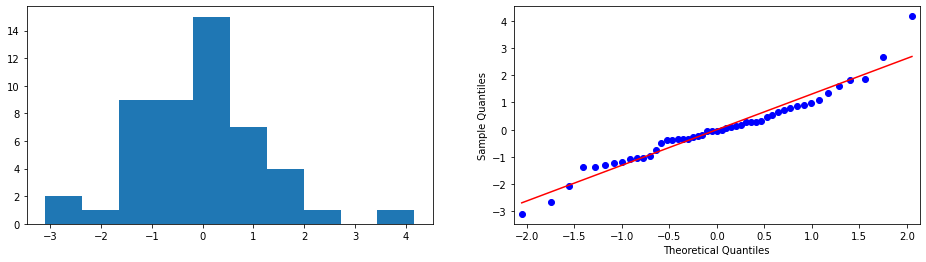

In [111]:
# распределение остатков

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m1fitted.resid.hist(ax=ax1, grid=False)
qqplot(m1fitted.resid, line='r',ax=ax2)

plt.show()

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


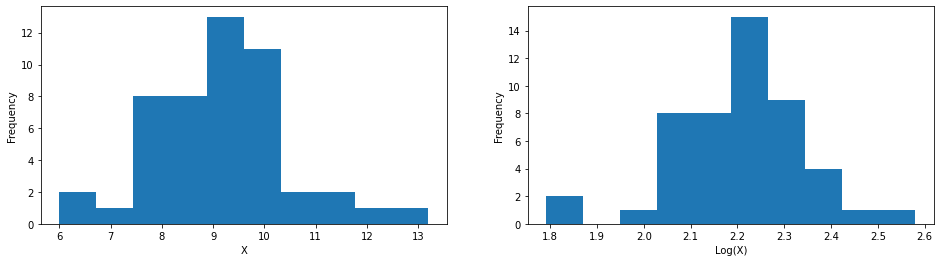

In [112]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

data['X'].plot.hist(ax=ax1, grid=False)
ax1.set_xlabel("X")

np.log(data['X']).plot.hist(ax=ax2, grid=False)
ax2.set_xlabel("Log(X)")

plt.show()

In [113]:
m2 = smf.ols('np.log(X) ~ Y', data=data)
m2fitted = m2.fit()

print(m2fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              np.log(X)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6381
Date:                Wed, 05 May 2021   Prob (F-statistic):              0.428
Time:                        19:05:26   Log-Likelihood:                 27.615
No. Observations:                  49   AIC:                            -51.23
Df Residuals:                      47   BIC:                            -47.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2964      0.112     20.486      0.0

Показатели улучшились

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


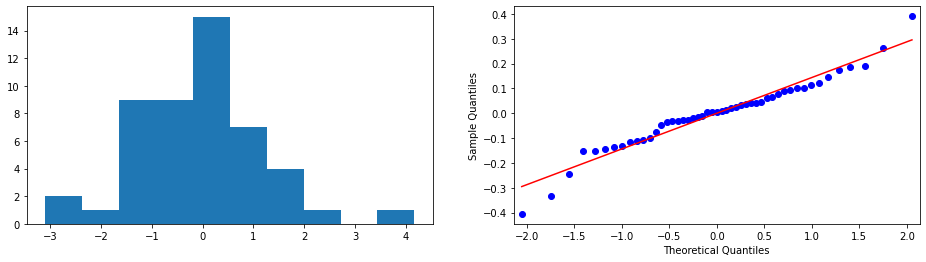

In [114]:


fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m1fitted.resid.hist(ax=ax1, grid=False)
qqplot(m2fitted.resid, line='r',ax=ax2)

plt.show()

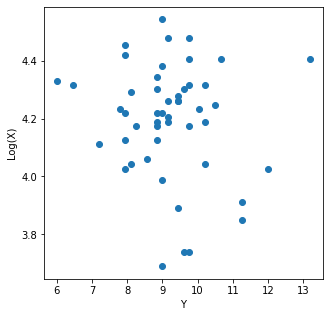

In [115]:
plt.figure(figsize=(5,5))

plt.scatter(data['X'],np.log(data['Y']))
plt.xlabel('Y')
plt.ylabel('Log(X)')

plt.show()

Видим, что "линия жизни" и жизнь не связаны линейной регрессионной зависимостью.

#### 2. В файле homes.csv содержатся данные о цене продажи 50 домов. Что можно сказать о связи первых двух признаков? Постройте (хорошую) линейную регрессию для признака Sell с и без признака List. Не забудьте о преобразовании признаков, если они будут нужны.

In [142]:
data = pd.read_csv('../HW5_Data/homes.csv')
data.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


1) Sell — цена продажи;
2) List — запрашиваемая цена;
3) Living — жилая площадь;
4) Rooms — количество комнат;
5) Beds — количество спален;
6) Baths — количество ванных комнат;
7) Age — возраст жилого помещения;
8) Acres — площадь жилого помещения;
9) Taxes — налоги, которые должен платить владелец жилого помещения.

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


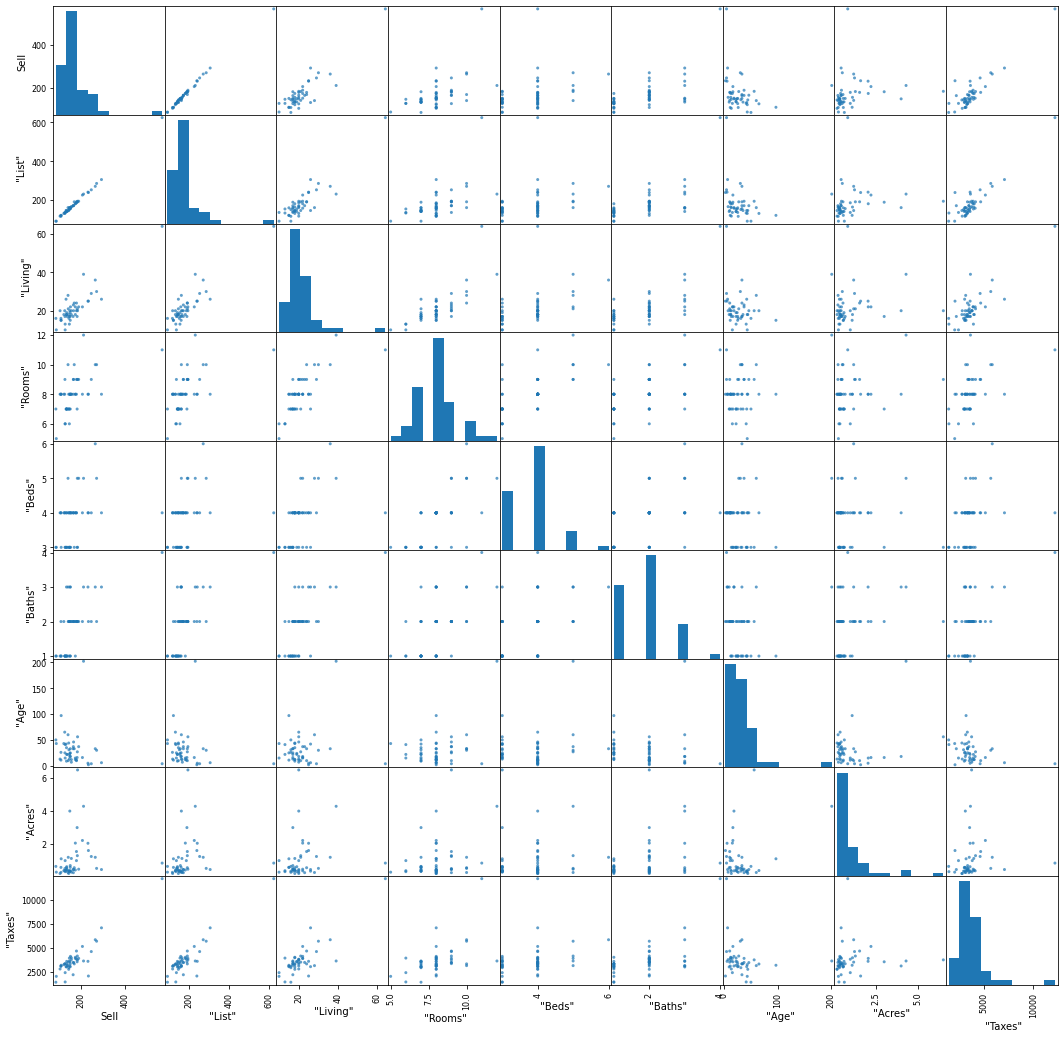

In [143]:
pd.plotting.scatter_matrix(data[list(data.columns)], figsize=(18, 18), alpha=0.7)
plt.show()

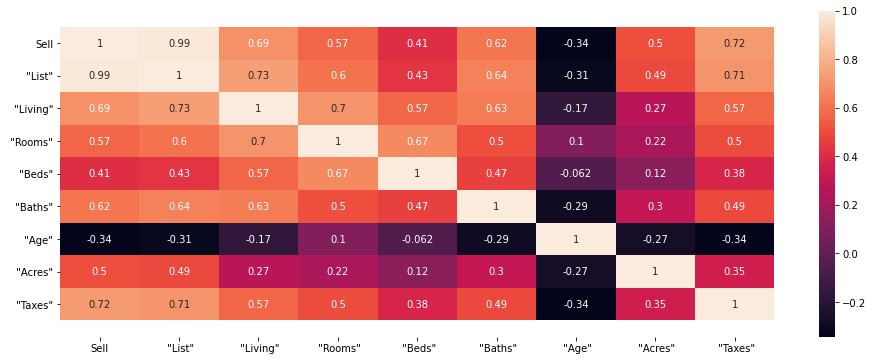

In [144]:
plt.figure(figsize = (16,6))
ax = sns.heatmap(data[list(data.columns)].corr(method = 'spearman'), annot = True)

# подправим вывод
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#####

plt.show()

Предварительная обработка данных:

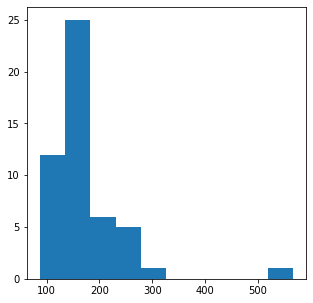

In [145]:
data['Sell'].hist(figsize=(5,5), grid=False)
plt.show()

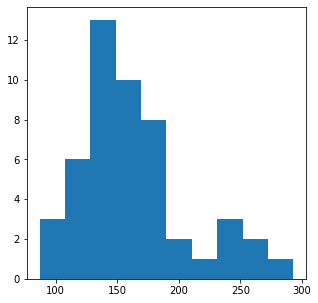

In [146]:
# удалим выброс
data = data[data['Sell'] < 350]
data['Sell'].hist(figsize=(5,5), grid=False)
plt.show()

In [147]:
data.rename(columns = {' "List"':'List',	' "Living"':'Living',
                     ' "Rooms"':"Rooms",' "Beds"':	"Beds",' "Baths"':	"Baths",
                     ' "Age"':"Age", ' "Acres"':	"Acres", ' "Taxes"':	"Taxes"},
            inplace=True
           )
data.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


Посомтрим на кожффициенты между Sell и List

In [148]:
sell = data['Sell']
list_ = data['List']
# коэффициент корреляции Пирсона

stats.pearsonr(sell,list_)

(0.995328161479454, 2.232709536989096e-49)

In [149]:
# коэффициент корреляции Спирмена

stats.spearmanr(sell,list_)

SpearmanrResult(correlation=0.9868486906033123, pvalue=7.442814910794543e-39)

In [150]:
# коэффициент корреляции Кендалла

stats.kendalltau(sell,list_)

KendalltauResult(correlation=0.9349108479221306, pvalue=8.18949461882585e-21)

Значения цены продажи и запрашиваемой цены положительно коррелируют. И эта корреляция значима.

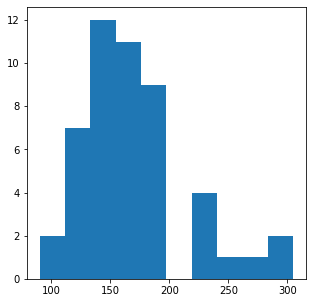

In [151]:
data['List'].hist(figsize=(5,5), grid=False)
plt.show()

In [152]:
data['List'].value_counts()[:5]

145    4
160    3
140    3
170    3
190    3
Name: List, dtype: int64

In [153]:
# разделим запрашиваемую цену на выше среднюю и ниже среднее
data['belowavg'] = data['List'].apply(lambda x: 1 if x < 150 else 0)
data['aboveavg'] = data['List'].apply(lambda x: 1 if x > 150 else 0)
# data.drop('List', axis=1, inplace=True)

In [154]:
data.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes,belowavg,aboveavg
0,142,160,28,10,5,3,60,0.28,3167,0,1
1,175,180,18,8,4,1,12,0.43,4033,0,1
2,129,132,13,6,3,1,41,0.33,1471,1,0
3,138,140,17,7,3,1,22,0.46,3204,1,0
4,232,240,25,8,4,3,5,2.05,3613,0,1


In [155]:
m1 = smf.ols('Sell ~ Living + Rooms + Beds + Baths + Age + Acres + Taxes + belowavg + aboveavg', data=data)
m1fitted = m1.fit()

print(m1fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     17.62
Date:                Wed, 05 May 2021   Prob (F-statistic):           3.61e-11
Time:                        19:39:35   Log-Likelihood:                -216.21
No. Observations:                  49   AIC:                             452.4
Df Residuals:                      39   BIC:                             471.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.2218     33.890      2.485      0.0

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


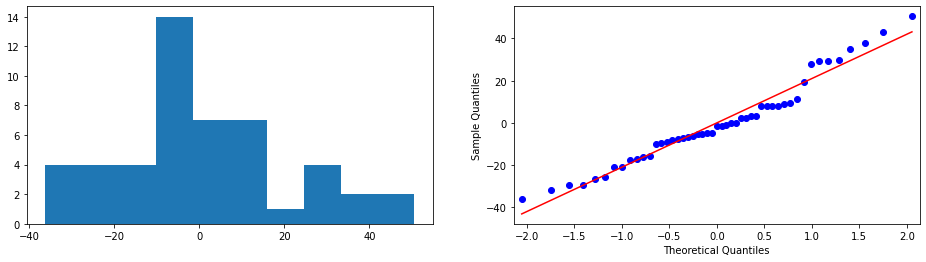

In [156]:
# смотрим на остатки
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m2fitted.resid.hist(ax=ax1, grid=False)
qqplot(m2fitted.resid, line='r',ax=ax2)

plt.show()

Преобразование признаков

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


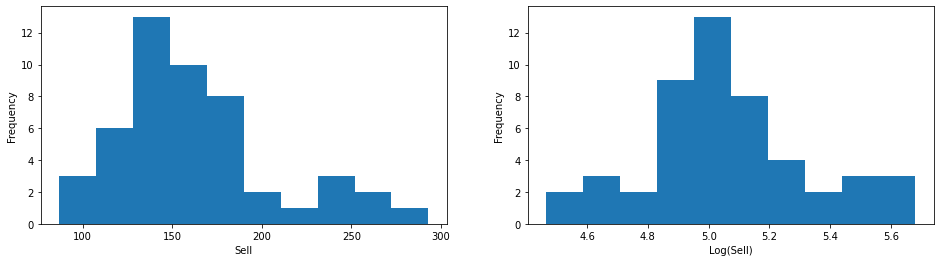

In [157]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

data['Sell'].plot.hist(ax=ax1, grid=False)
ax1.set_xlabel("Sell")

np.log(data['Sell']).plot.hist(ax=ax2, grid=False)
ax2.set_xlabel("Log(Sell)")

plt.show()

In [168]:
m2 = smf.ols('np.log(Sell) ~ Living + Rooms + Beds + Baths + Age + Acres + Taxes + belowavg + aboveavg', data=data)
m2fitted = m2.fit()

print(m2fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Sell)   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     19.73
Date:                Wed, 05 May 2021   Prob (F-statistic):           6.44e-12
Time:                        19:45:36   Log-Likelihood:                 37.778
No. Observations:                  49   AIC:                            -55.56
Df Residuals:                      39   BIC:                            -36.64
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6233      0.190     24.323      0.0

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


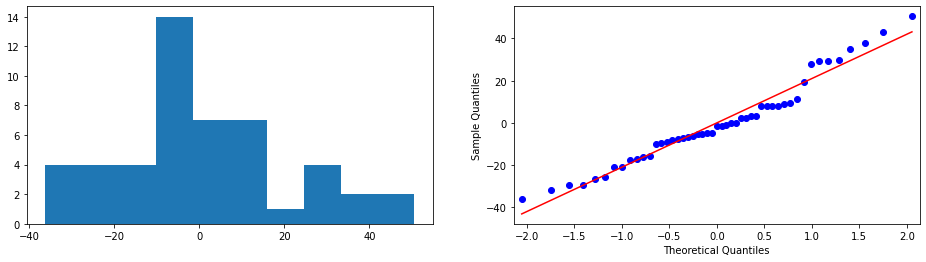

In [159]:
# смотрим остатки
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m2fitted.resid.hist(ax=ax1, grid=False)
qqplot(m2fitted.resid, line='r',ax=ax2)

plt.show()

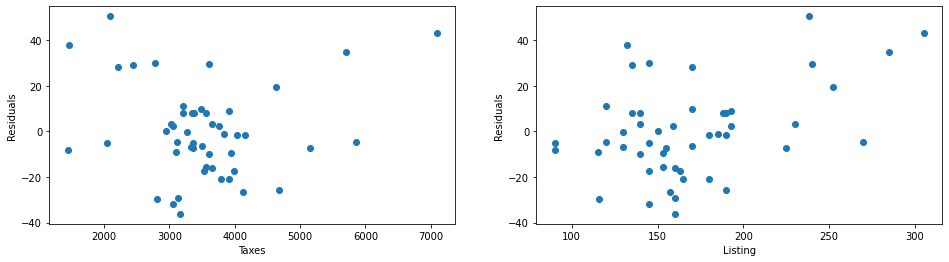

In [161]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4)) 

ax1.scatter(data['Taxes'],m2fitted.resid)
ax1.set_xlabel('Taxes')
ax1.set_ylabel('Residuals')

ax2.scatter(data['List'],m2fitted.resid)
ax2.set_xlabel('Listing')
ax2.set_ylabel('Residuals')

plt.show()

По второму графику может показаться, что остатки расположены несимметрично относительно нуля. Так может произойти, например, если зависимость запрашиваемая цена не является линейной. Посмотрим на эту зависимость повнимательнее.

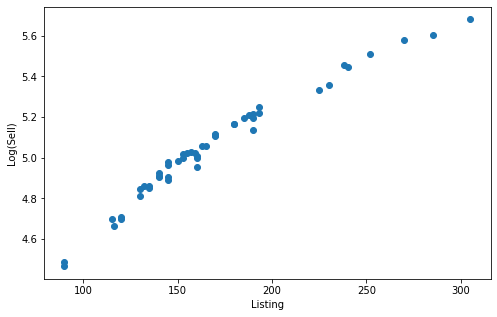

In [165]:
plt.figure(figsize=(8,5))

plt.scatter(data['List'],np.log(data['Sell']))
plt.xlabel('Listing')
plt.ylabel('Log(Sell)')

plt.show()

In [202]:
m3 = smf.ols('np.log(Sell) ~ Living + np.log(Living) + Rooms + Beds + Baths + Age + Acres + Taxes + belowavg + aboveavg', data=data)
m3fitted = m3.fit()

print(m3fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Sell)   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     17.66
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.20e-11
Time:                        20:42:01   Log-Likelihood:                 38.190
No. Observations:                  49   AIC:                            -54.38
Df Residuals:                      38   BIC:                            -33.57
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.2253      0.774      6.

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


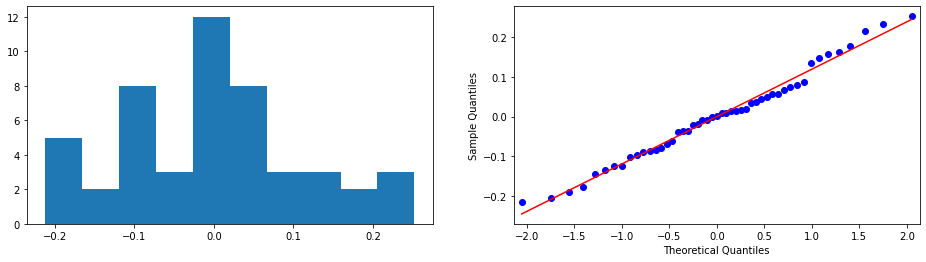

In [203]:
# смотрим остатки
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m3fitted.resid.hist(ax=ax1, grid=False)
qqplot(m2fitted.resid, line='r',ax=ax2)

plt.show()

Ситуация улучшилась: распределение остатков стало более гомоскедастичным и симметричным относительно нуля. Хоть и коэффициент детерминации  𝑅2
R
2
  сильно не изменился, оставим этот признак в нашей модели, так как симметричность и гомоскедастичность ошибок улучшит точность доверительных интервалов для коэффициентов регрессии и проверку гипотез о их значениях (доверительные интервалы и критерии строятся в предположении о нормальности ошибок).

In [204]:
# Удалим признак запрашиваемая цена
m4 = smf.ols('np.log(Sell) ~ Rooms + Beds + Baths + Age + Acres + Taxes + belowavg + aboveavg', data=data)
m4fitted = m4.fit()

print(m4fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Sell)   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     15.20
Date:                Wed, 05 May 2021   Prob (F-statistic):           5.89e-10
Time:                        20:42:06   Log-Likelihood:                 29.983
No. Observations:                  49   AIC:                            -41.97
Df Residuals:                      40   BIC:                            -24.94
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4162      0.211     20.938      0.0

Модель 4 (без признака List) по коэффициентам хуже.

In [205]:
# Оценим модель по кретерию Фишера:

print("F=%f, pvalue=%f, k1=%f" % m3fitted.compare_f_test(m4fitted))

F=7.560061, pvalue=0.001722, k1=2.000000


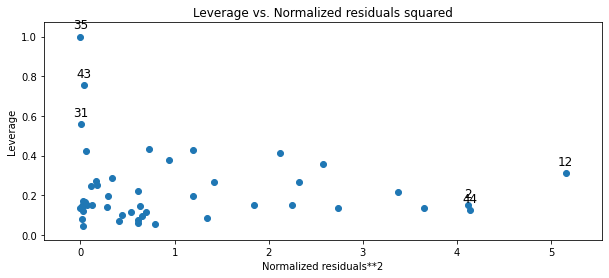

In [206]:
plt.rc("figure", figsize=(10,4))
plot_leverage_resid2(m3fitted)
plt.show()

Удаление других признаков не принесло результатов. Лучшая оказалась модель №3 Она объясняет примерно $80\%$ вариации отклика — логарифма цены продажи. Выпишем регрессионное уравнение:

$$
\log(\text{Sell}) \approx 
+0.0381 \cdot \text{Living} -0.3147  \cdot \log{\text{Living}}
-0.0264 \cdot \text{Rooms} +0.0211 \cdot \text{Beds}
-0.0252 \cdot \text{Baths} -0.0017 \cdot \text{Age}\\
+0.0313 \cdot \text{Acres}  +0.00007 \cdot \text{Taxes}
-0.2023 \cdot \text{belowavg}  -0.0201 \cdot \text{aboveavg}.
$$
  
Это можно записать в следующем виде: 

$$
\text{Sell} \approx  {-0.3147 \cdot {\text{Living}}} \cdot e^{+0.0381 \text{Living }}  
\cdot e^{-0.0264 \text{Rooms}} \cdot e^{+0.0211 \text{Beds}}
\cdot e^{-0.0252 \text{Baths}} \cdot e^{-0.0017 \text{Age}}
\cdot e^{0.0313 \text{Acres}} \cdot e^{ -0.0021\text{Taxes}}
\cdot e^{-0.2023 \text{belowavg}} \cdot e^{ -0.0201\text{aboveavg}}.
$$
